# **Task_30**
# What is Preprocessing?
Preprocessing is a crucial step in data analysis and machine learning that involves transforming raw data into a format that is suitable for analysis and model building. This step typically includes cleaning the data by removing or correcting errors, handling missing values, and ensuring consistency across the dataset. Preprocessing may also involve normalizing or scaling numerical features, encoding categorical variables, and reducing dimensionality to improve computational efficiency.

In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [79]:
df = pd.read_csv('/content/drive/MyDrive/ByteWise Tasks/weather_dataset.csv')
print("Original DataFrame:")
df.head()

Original DataFrame:


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,01/01/2012 0:00,-1.8,-3.9,86.0,4.0,8.0,101.24,Fog
1,01/01/2012 1:00,-1.8,-3.7,87.0,4.0,8.0,101.24,Fog
2,01/01/2012 2:00,-1.8,-3.4,89.0,7.0,4.0,101.26,"Freezing Drizzle,Fog"
3,01/01/2012 3:00,-1.5,-3.2,88.0,6.0,4.0,101.27,"Freezing Drizzle,Fog"
4,01/01/2012 4:00,-1.5,-3.3,88.0,7.0,4.8,101.23,Fog


**Handling Categorical Data Column**

In [82]:
# Handling categorical data: Label Encoding
label_encoder = LabelEncoder()
df['Weather_Label'] = label_encoder.fit_transform(df['Weather'])

# Display the dataframe with label encoded weather column
print("\nDataFrame with Label Encoded Weather:")
print(df.head())

# Handling categorical data: One Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
weather_encoded = one_hot_encoder.fit_transform(df[['Weather']])

# Create a DataFrame with one-hot encoded columns
weather_encoded_df = pd.DataFrame(weather_encoded, columns=one_hot_encoder.get_feature_names_out(['Weather']))

# Concatenate the original dataframe with the one-hot encoded dataframe
df = pd.concat([df, weather_encoded_df], axis=1)

# Drop the original 'Weather' column as it is now encoded
df.drop('Weather', axis=1, inplace=True)

# Display the dataframe with one-hot encoded weather columns
print("\nDataFrame with One-Hot Encoded Weather:")
print(df.head())



DataFrame with Label Encoded Weather:
         Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  01/01/2012 0:00    -1.8              -3.9       86.0              4.0   
1  01/01/2012 1:00    -1.8              -3.7       87.0              4.0   
2  01/01/2012 2:00    -1.8              -3.4       89.0              7.0   
3  01/01/2012 3:00    -1.5              -3.2       88.0              6.0   
4  01/01/2012 4:00    -1.5              -3.3       88.0              7.0   

   Visibility_km  Press_kPa               Weather  Weather_Label  
0            8.0     101.24                   Fog              7  
1            8.0     101.24                   Fog              7  
2            4.0     101.26  Freezing Drizzle,Fog              9  
3            4.0     101.27  Freezing Drizzle,Fog              9  
4            4.8     101.23                   Fog              7  

DataFrame with One-Hot Encoded Weather:
         Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind

In [84]:
# Find number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Date/Time                                           0
Temp_C                                              0
Dew Point Temp_C                                    0
Rel Hum_%                                           1
Wind Speed_km/h                                     1
Visibility_km                                      17
Press_kPa                                          22
Weather_Label                                       0
Weather_Clear                                       0
Weather_Cloudy                                      0
Weather_Drizzle                                     0
Weather_Drizzle,Fog                                 0
Weather_Drizzle,Ice Pellets,Fog                     0
Weather_Drizzle,Snow                                0
Weather_Drizzle,Snow,Fog                            0
Weather_Fog                                         0
Weather_Freezing Drizzle                            0
Weather_Freezing Drizzle,Fog                        0
Weather_Freezing Drizzle,Haz

**Handling Missing Values**

In [85]:


# Imputation: Handling missing values
imputer = SimpleImputer(strategy='mean')
numerical_columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Before imputation
print("\nDataFrame Before Imputation:")
print(df[numerical_columns].head())

df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# After imputation
print("\nDataFrame After Imputation:")
print(df[numerical_columns].head())



DataFrame Before Imputation:
   Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0    -1.8              -3.9       86.0              4.0            8.0   
1    -1.8              -3.7       87.0              4.0            8.0   
2    -1.8              -3.4       89.0              7.0            4.0   
3    -1.5              -3.2       88.0              6.0            4.0   
4    -1.5              -3.3       88.0              7.0            4.8   

   Press_kPa  
0     101.24  
1     101.24  
2     101.26  
3     101.27  
4     101.23  

DataFrame After Imputation:
   Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0    -1.8              -3.9       86.0              4.0            8.0   
1    -1.8              -3.7       87.0              4.0            8.0   
2    -1.8              -3.4       89.0              7.0            4.0   
3    -1.5              -3.2       88.0              6.0            4.0   
4    -1.5              -3.3       88

**Standardizing the data**

In [86]:
# Standardization: Scaling numerical features
scaler = StandardScaler()

# Before standardization
print("\nDataFrame Before Standardization:")
print(df[numerical_columns].head())

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# After standardization
print("\nDataFrame After Standardization:")
print(df[numerical_columns].head())



DataFrame Before Standardization:
   Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0    -1.8              -3.9       86.0              4.0            8.0   
1    -1.8              -3.7       87.0              4.0            8.0   
2    -1.8              -3.4       89.0              7.0            4.0   
3    -1.5              -3.2       88.0              6.0            4.0   
4    -1.5              -3.3       88.0              7.0            4.8   

   Press_kPa  
0     101.24  
1     101.24  
2     101.26  
3     101.27  
4     101.23  

DataFrame After Standardization:
     Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
0 -0.906815         -0.593184   1.097564        -1.259875      -1.559009   
1 -0.906815         -0.574805   1.156673        -1.259875      -1.559009   
2 -0.906815         -0.547238   1.274891        -0.914575      -1.876168   
3 -0.881146         -0.528860   1.215782        -1.029675      -1.876168   
4 -0.881146     

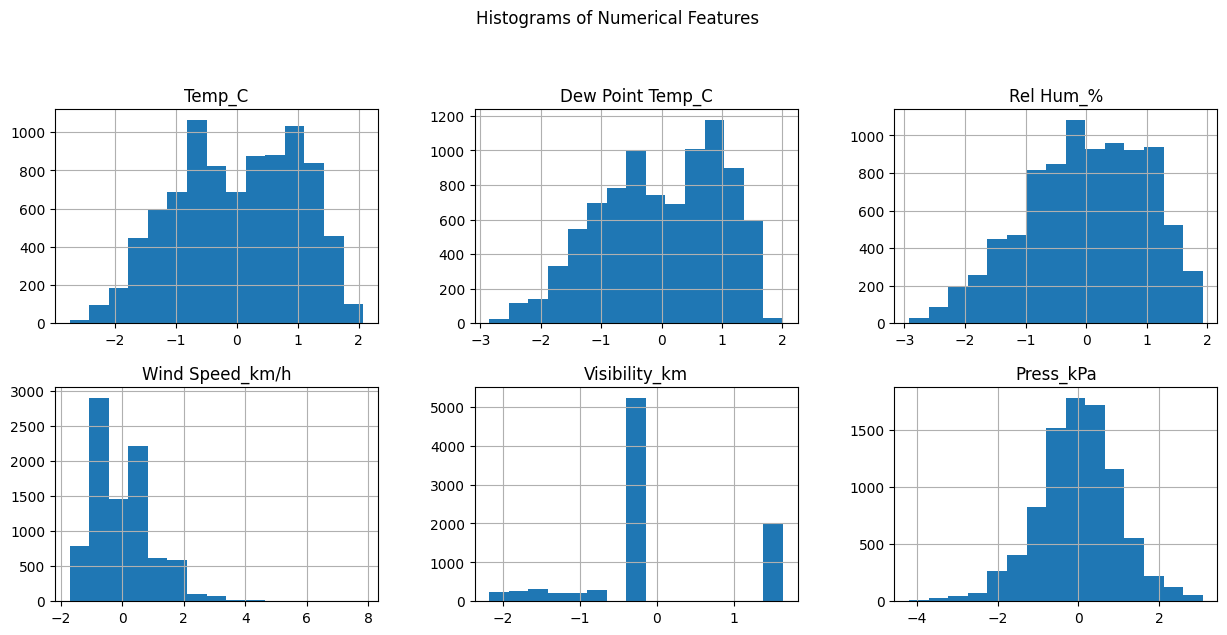

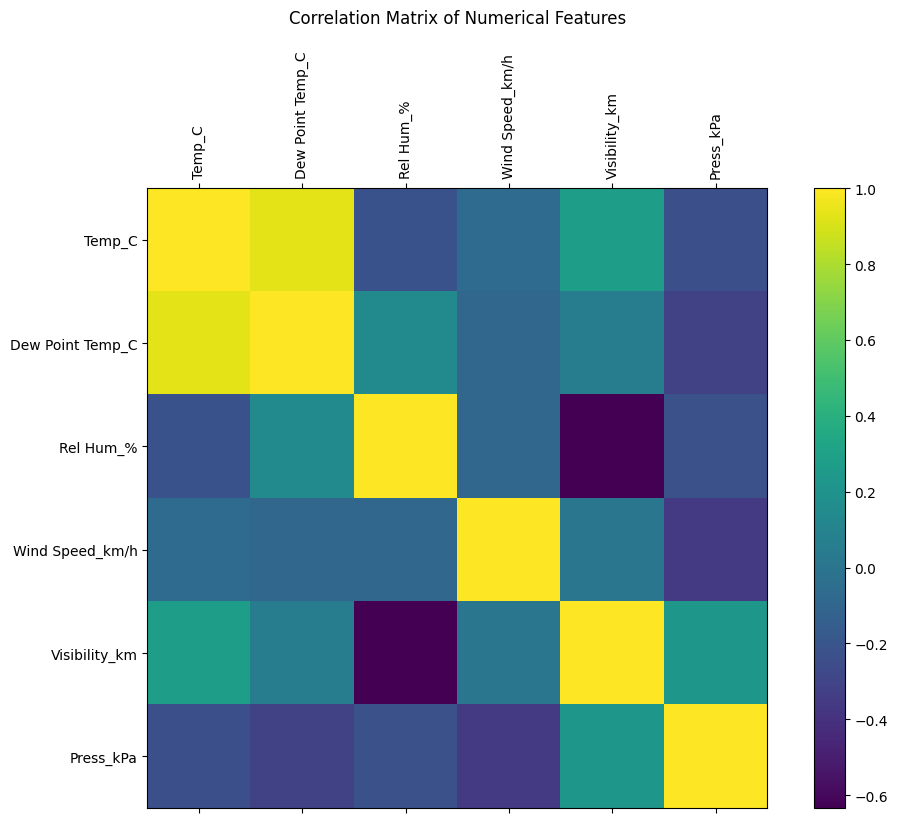

In [87]:
# Plot histograms for each numerical feature
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Plot the correlation matrix
corr_matrix = pd.DataFrame(df[numerical_columns], columns=numerical_columns).corr()
plt.figure(figsize=(12, 8))
plt.matshow(corr_matrix, fignum=1)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix of Numerical Features', pad=20)
plt.show()
